<a href="https://colab.research.google.com/github/benji555-create/Data-Science/blob/main/BGUnit8ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 8 Exercises: The Art of BART

These exercises are grouped into two parts:

- Questions on the nature of decision trees, random forests, and BART models
- An oppurtunity to practice implementing and analyzing a BART model.

Enjoy!

## Bartian Theory

**Task1**:

Draw a decision tree--on a physical piece of paper--that predicts how much time you'll spend studying on a given day, using the amount of sleep you got the night before as a predictor.

If this seems to easy, then add another variable or two (test tomorrow? activity after school?), and/or increase the depth of your tree.

You do not have to show me or turn in your tree to earn credit for this question, although I would like to see your drawing.

**Task2**:

What is a decision tree? How do they work?

A decision tree is almost like a flow chart. Decision trees model decisions and their possible consequences. They have root nodes, which is basically where a decision tree starts, with this node splitting into two or more branches based on the data. They also have leaf nodes, which are nodes with no children. Basically, a decision tree works like a flow chart. At the root node, your data chooses or falls under option a, option b... option n. Based on that option, your data goes under another decision between options, eventually ending in a leaf node, or a final answer.

**Task3**:

What does the "depth" of a decision tree mean?

How do I know if a tree is too deep, or not deep enough?

The depth of the decision tree is the number of levels between the root node and the farthest leaf node. Decision trees can underfit and overfit, and this happens when they are either not deep enough or too deep, respectively. The depth covers the complexity of a decision tree, and the 'deeper' a decision tree is the more paths and options there are for the data to fall under. If it doesn't have enough depth, then some data wont be filitered correctly, so it can result in unsorted data with it not truly giving you the information you want. Too deep of decision trees can overfit the data and ruin any possible trends,

**Task4:**

How are BART models similar and different from a decision tree?

Both models use trees to make predictions, splitting data into branches based on features and sort them into decisions at end nodes. Decision trees use one single tree to represent the data, sorting it into leaf nodes. On the other hand, BART models combines the predictions of multiple decision trees, resulting in more complex nodes with stronger data.

**Task5**:

Why would we use a BART model instead of a decision tree?

A BART model is a more complicated decision tree, as it utilizes multiple decision trees to build a stronger model, while a decision tree only uses one tree. A BART model also prevents overfitting, while decision trees can become much to complex and overfit the data if its too deep. BART models can get a stronger read of the data, and generalizes it better than just one decision tree could.

## Bartian Penguins

**Task6**:

Create a BART model that uses flipper length, bill depth, and bill length to predict body mass in penguins, and make a ppc to check its fit

Code for loading the data is below. You'll need to do everything else yourself.

Remember to use my notes as a reference, and to copy and paste from them when it makes sense to.

Oh, and try a normal likelihood.

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
from sklearn import tree
!pip install pymc-bart
!pip install preliz
import pymc_bart as pmb
import preliz as pz

In [ ]:
#drop the incomplete rows from the data
url="https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/penguins.csv"
penguins = pd.read_csv(url).dropna()

In [ ]:
features = ["flipper_length", "bill_length","bill_depth"]

X = penguins[features]
Y = penguins["body_mass"].to_numpy()

In [ ]:
with pm.Model() as model_octps:
    s = pm.HalfNormal('s',1000)
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50)
    μ = pm.Deterministic("μ",pm.math.exp(μ_))
    y = pm.Normal("y", mu=μ, sigma=s,  observed=Y)
    idata_octps = pm.sample(compute_convergence_checks=False)

Output()

Output()

<Axes: xlabel='y'>

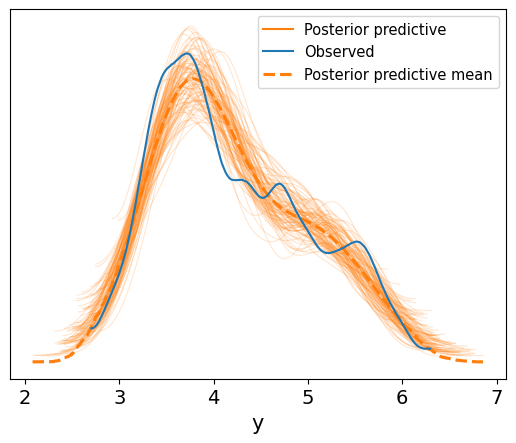

In [ ]:
pm.sample_posterior_predictive(idata_octps,model_octps, extend_inferencedata=True)
az.plot_ppc(idata_octps, num_pp_samples=100, colors=["C1", "C0", "C1"])

**Task7**:

Plot flipper length versus body mass,

and then plot the posterior predictive from the model over the data.
You're going to copy paste the plotting code from the notes, fyi.

In [15]:

posterior_mean = idata_octps.posterior["μ"]

μ_hdi = az.hdi(ary=idata_octps, group="posterior", var_names=["μ"], hdi_prob=0.74)
pps = az.extract(
    idata_octps, group="posterior_predictive", var_names=["y"]
).T
Xn = X.to_numpy()


/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


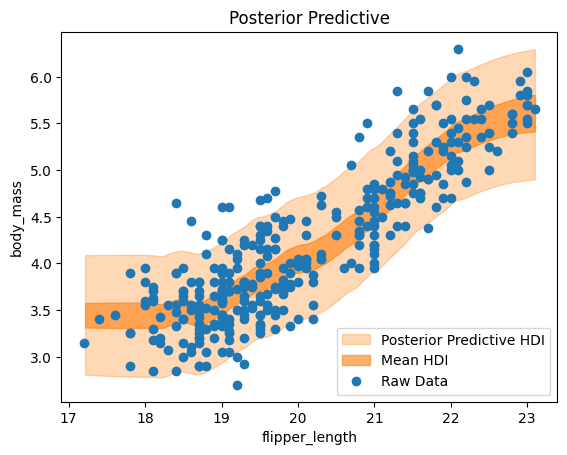

In [16]:
idx = np.argsort(Xn[:, 0])
fig, ax = plt.subplots()

az.plot_hdi(
    x=Xn[:, 0],
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive HDI"},
)

az.plot_hdi(
    x=Xn[:, 0],
    y=posterior_mean,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean HDI"},
)
ax.plot(penguins["flipper_length"], penguins["body_mass"], "o", c="C0", label="Raw Data")
ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive",
    xlabel="flipper_length",
    ylabel="body_mass",
);


**Task8**:

Interpret the plot above in context. Do you think it captures the true association between flipper length and body mass in penguins? Why or why not? Make sure to reference specific things you see in the plot.

Yes it seems like it as it captures almost all of the points, missing barely any plot points. The slope is also very accurate, and as it captures a high percentage of the data points and accurately captures the slope then I think it is a good representaitoin of the true association between flipper length and body mass.

**Task9**:

Create partial depnedence plots (pdps), individual conditional expectation (ice) plots, and a variable importance plot for the BARTpenguin model.

array([<Axes: xlabel='flipper_length'>, <Axes: xlabel='bill_length'>,
       <Axes: xlabel='bill_depth'>], dtype=object)

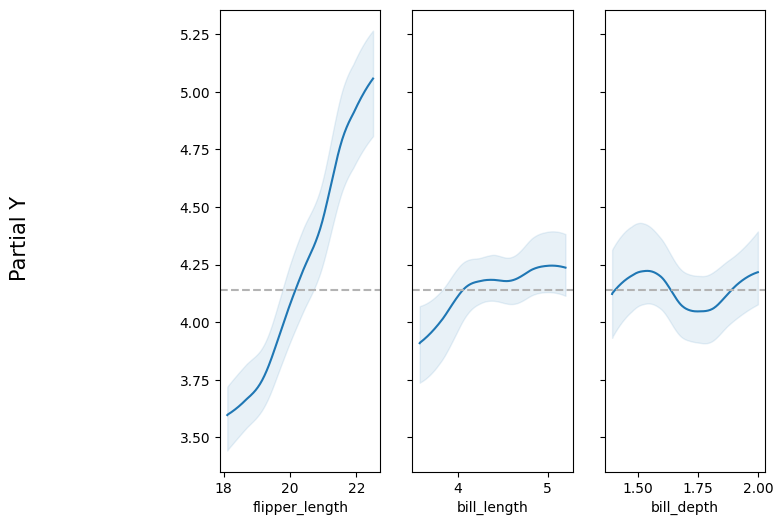

In [17]:
pmb.plot_pdp(μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

array([<Axes: xlabel='flipper_length'>, <Axes: xlabel='bill_length'>,
       <Axes: xlabel='bill_depth'>], dtype=object)

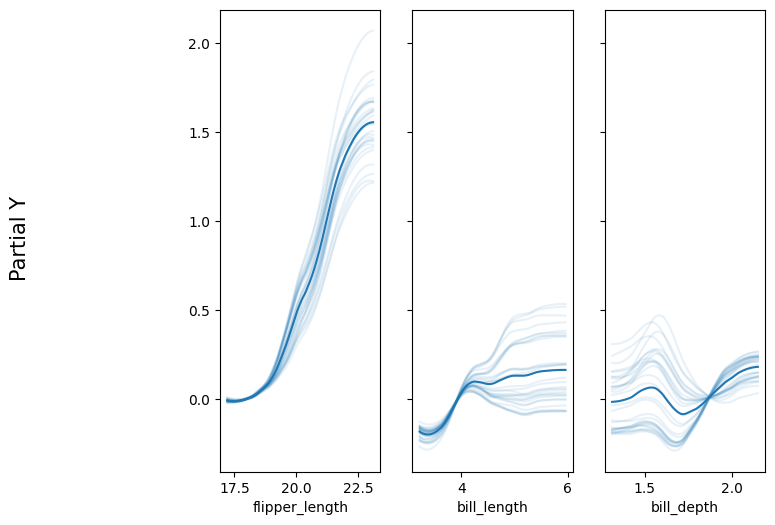

In [18]:
pmb.plot_ice( μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

<Axes: ylabel='R²'>

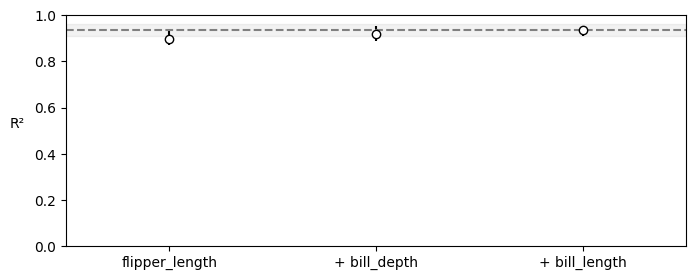

In [19]:
vi_counties = pmb.compute_variable_importance(idata_octps, μ_, X)
pmb.plot_variable_importance(vi_counties)

**Task10**:

Using the above plots, make an argument about which variable(s) is/are most important in predicting body mass in penguins.

What is the relationship for each variable to body mass, when you take the other variables into account?

Is that relationship complicated by interactions between variables? How do you know?

Make sure to reference specific things you see in each plot, to justify your decisions and comments.

According to the ice and pdp plots, flipper length has the highest impact. The slope shows that it has the strongest correlation. While bill depth and bill length also show some correlation, it isn't as strong as flipper length. The slopes of bill depth and length also vary heavily, so their impact is different and not as strong as flipper length.